<h1 align = center> Regression Through Baseline Models, ANN and CNN </h1>

<h2 align = center> <font color = '#12EEFF'> Importing Libraries </font></h2>

In [1]:

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense,Dropout
from tensorflow.keras.regularizers import l2

from keras.layers import MaxPooling1D, Flatten, Dense, Conv1D


from sklearn import metrics

from scipy import stats


<h2 align = center> <font color = '#FF8800'> Importing Dataset </font></h2>

In [2]:
data = pd.read_csv(('zameen.csv'))
data

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


<h2 align = center> <font color = '#00AAFF'> Exploring Dataset </font></h2>

### Data Columns

In [3]:
data.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category'],
      dtype='object')

### Data Columns Datatypes

In [4]:
data.dtypes

property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
area              object
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
Area Type         object
Area Size        float64
Area Category     object
dtype: object

### Overview Of Data

In [5]:


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

### Checking For Missing Values

In [6]:
data.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

#### There are missing Values in agency and agent columns

<h2 align = center> <font color ="#FFFF12"> Exploratory Data Analysis

---
<h3 align = center> 'property_type' </h3> 

---

#### Count

In [7]:

count = data['property_type'].value_counts()
count

property_type
House            105468
Flat              38238
Upper Portion     13774
Lower Portion      9229
Room                685
Farm House          657
Penthouse           395
Name: count, dtype: int64

### Bar Plot

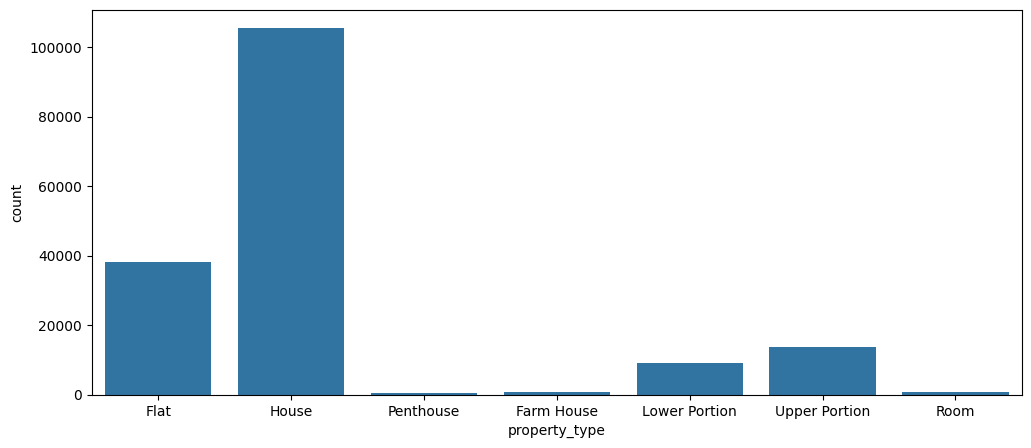

In [8]:
plt.figure(figsize=(12,5))

sns.countplot(x = 'property_type', data = data)

plt.show()

### Interpretation

From this plot, we can see that houses are the most listed after that flat is the most.

### Count Of property_type with purpose

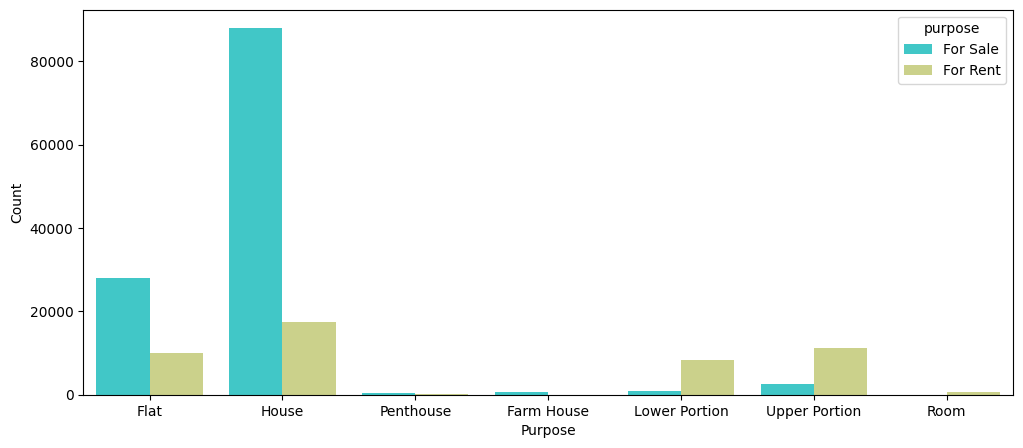

In [9]:
plt.figure(figsize=(12,5))

sns.countplot(x = 'property_type', data = data , hue= 'purpose' , palette='rainbow')

plt.xlabel('Purpose')

plt.ylabel('Count')


plt.show()

### Interpretation

Houses are more listed for Sale purpose

---
<h3 align = center> 'location' </h3> 

---

#### Counts

In [10]:
counts = data['location'].value_counts()
print(counts)

location
DHA Defence                   22046
Bahria Town Karachi            8548
Bahria Town Rawalpindi         8502
Bahria Town                    6429
Gulistan-e-Jauhar              5877
                              ...  
Firdous Colony                    1
Samsani Road                      1
Gulfishan Town                    1
Vital Homes Housing Scheme        1
Sundar                            1
Name: count, Length: 1509, dtype: int64


#### Bar Plot (Top 10 Locations)

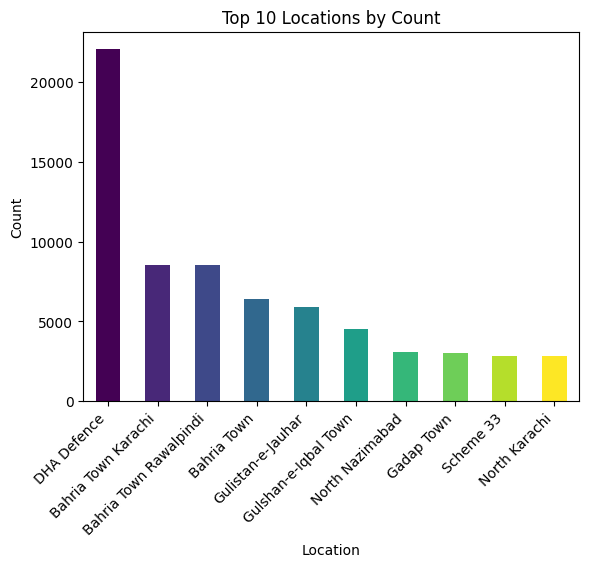

In [11]:
top_locations = counts.head(10)
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(top_locations)))
top_locations.plot(kind='bar' ,color = colors )
plt.title('Top 10 Locations by Count')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Interpretation

Most properties are listed in DHA Defence, Bahria Town Karachi, Bahria Town Rawalpindi and Bahria Town.



---
<h3 align = center> 'city' </h3> 

---



#### Value Counts

In [12]:
counts = data['city'].value_counts()
counts

city
Karachi       60484
Lahore        41427
Islamabad     37426
Rawalpindi    20976
Faisalabad     8133
Name: count, dtype: int64

### Bar Plot

C:\Users\Syed Abdullah\AppData\Local\Temp\ipykernel_28960\1045660547.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='city', data=data , palette='rainbow')


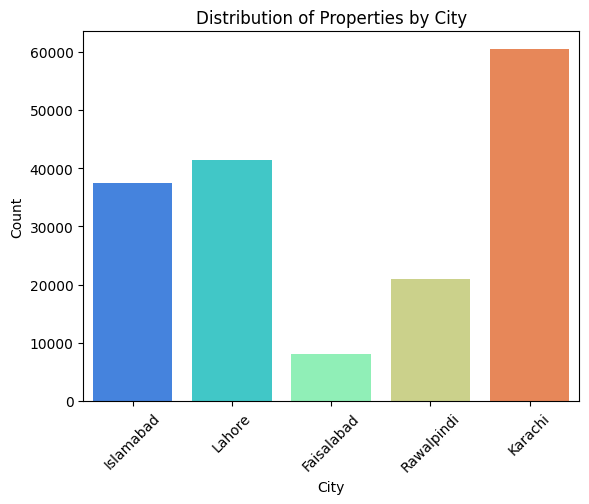

In [77]:
sns.countplot(x='city', data=data , palette='rainbow')
plt.title('Distribution of Properties by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Interpretation 

Karachi has the most listed ads.

#### Count Of City With Property Type

In [23]:

city_property = pd.crosstab(data['city'], data['property_type'])
print(city_property)

property_type  Farm House   Flat  House  Lower Portion  Penthouse  Room  \
city                                                                      
Faisalabad              5     46   6760            433          2    97   
Islamabad             240   7114  19912           4250         49   377   
Karachi                74  27001  25259           2681        319   131   
Lahore                274   1640  39365             59         12     8   
Rawalpindi             64   2437  14172           1806         13    72   

property_type  Upper Portion  
city                          
Faisalabad               790  
Islamabad               5484  
Karachi                 5019  
Lahore                    69  
Rawalpindi              2412  


#### Bar Plot of Property Types by City:

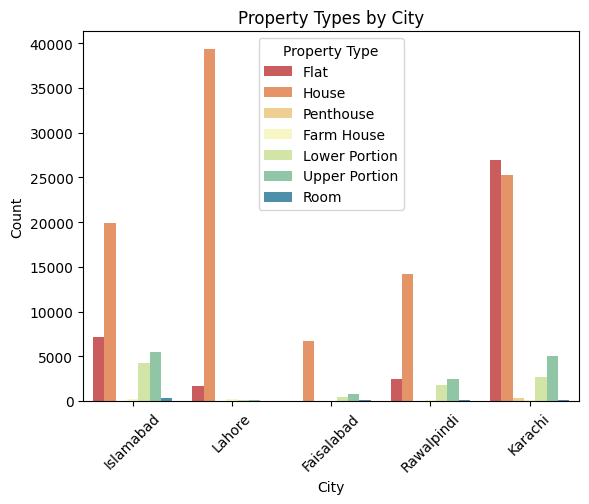

In [24]:

sns.countplot(x='city', hue='property_type', data=data , palette='Spectral')
plt.title('Property Types by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.show()

#### Interpretation

Lahore has the most house listed and karachi has the most flat listed


#### Count Of City With Purpose

In [25]:
city_purpose = pd.crosstab(data['city'], data['property_type'])
print(city_purpose)

property_type  Farm House   Flat  House  Lower Portion  Penthouse  Room  \
city                                                                      
Faisalabad              5     46   6760            433          2    97   
Islamabad             240   7114  19912           4250         49   377   
Karachi                74  27001  25259           2681        319   131   
Lahore                274   1640  39365             59         12     8   
Rawalpindi             64   2437  14172           1806         13    72   

property_type  Upper Portion  
city                          
Faisalabad               790  
Islamabad               5484  
Karachi                 5019  
Lahore                    69  
Rawalpindi              2412  


#### Bar Plot of Purpose by City:

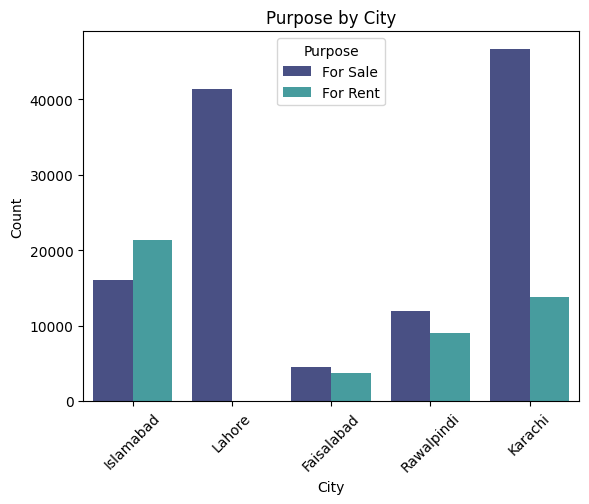

In [27]:

sns.countplot(x='city', hue='purpose', data=data , palette='mako')
plt.title('Purpose by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Purpose')
plt.show()

### Interpretation

Karachi has the most ads listed for Selling the property


---
<h3 align = center> 'province_name' </h3> 

---


#### Value Counts

In [28]:
counts = data['province_name'].value_counts()
counts

province_name
Punjab               70536
Sindh                60484
Islamabad Capital    37426
Name: count, dtype: int64

#### Bar Plot

C:\Users\Syed Abdullah\AppData\Local\Temp\ipykernel_22144\553480099.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='province_name', data=data , palette='viridis')


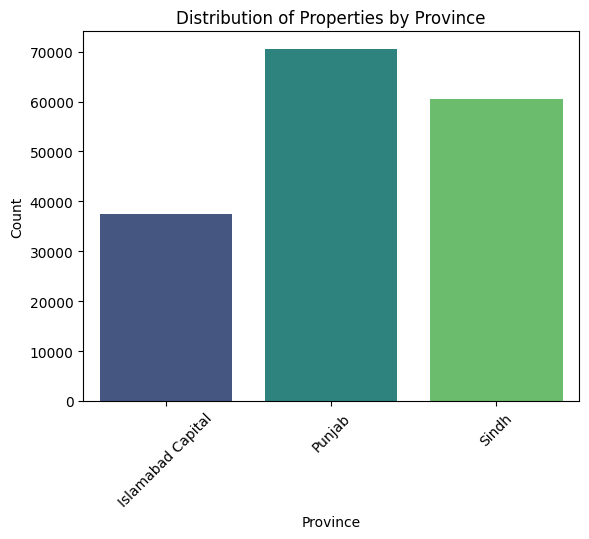

In [29]:
sns.countplot(x='province_name', data=data , palette='viridis')
plt.title('Distribution of Properties by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Interpretation

Punjab has the most ads listed

#### Bar Plot of Purpose by Province:

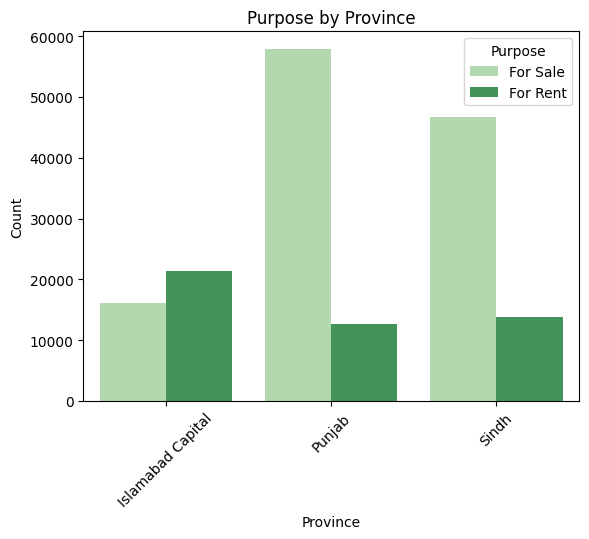

In [31]:

sns.countplot(x='province_name', hue='purpose', data=data , palette='Greens')
plt.title('Purpose by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Purpose')
plt.show()

#### Interpretation 


Punjab has most add listed for Selling the property province wise.


---
<h3 align = center> 'Area Type' </h3> 

---


#### Value Counts

In [32]:

counts = data['Area Type'].value_counts()
counts

Area Type
Marla    137769
Kanal     30677
Name: count, dtype: int64

#### Bar Plot

C:\Users\Syed Abdullah\AppData\Local\Temp\ipykernel_22144\1473211206.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Area Type', data=data , palette='magma')


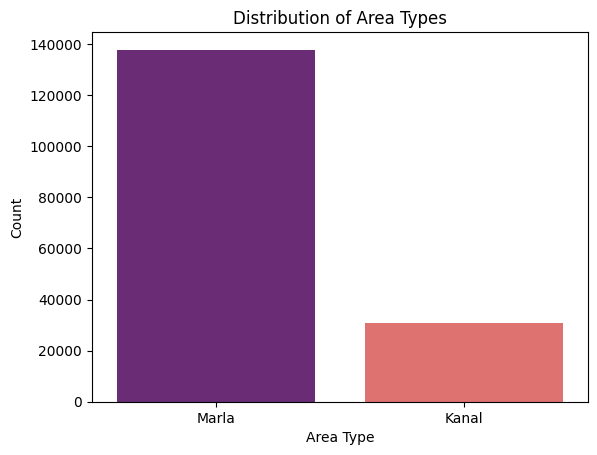

In [34]:
sns.countplot(x='Area Type', data=data , palette='magma')
plt.title('Distribution of Area Types')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.show()

#### Most of the ads listed have Area Type Marla


---
<h3 align = center> 'Area Category' </h3> 

---


#### Value Counts

In [35]:
counts = data['Area Category'].value_counts()
counts

Area Category
0-5 Marla        64501
5-10 Marla       56241
1-5 Kanal        30098
10-15 Marla      13840
15-20 Marla       3187
5-10 Kanal         332
15-20 Kanal         91
20-30 Kanal         44
10-15 Kanal         44
30-40 Kanal         23
40-50 Kanal         11
60-70 Kanal          8
400-500 Kanal        6
80-90 Kanal          5
100-200 Kanal        4
200-300 Kanal        3
70-80 Kanal          2
90-100 Kanal         2
50-60 Kanal          1
500-600 Kanal        1
600-700 Kanal        1
700-800 Kanal        1
Name: count, dtype: int64

#### Bar Plot

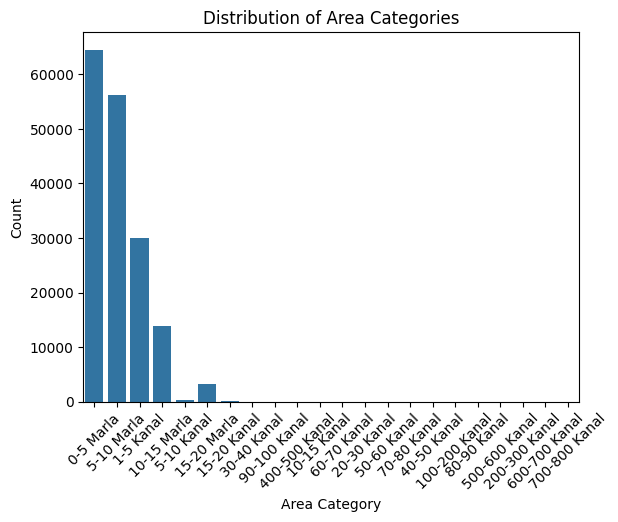

In [36]:
sns.countplot(x='Area Category', data=data)
plt.title('Distribution of Area Categories')
plt.xlabel('Area Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Interpretation

Most of the ads listed are ranges between 0-5 Marla

#### Area Category By City



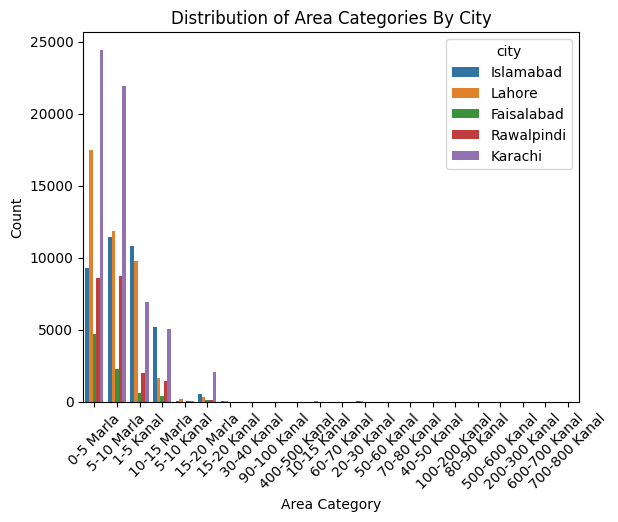

In [37]:

sns.countplot(x='Area Category', data=data , hue= 'city')
plt.title('Distribution of Area Categories By City')
plt.xlabel('Area Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Interpretation 

Most of the ads that have 0-5 Marla Category are from Karachi


---
<h3 align = center> 'price' </h3> 

---


#### Summary

In [39]:
price_summary = data['price'].describe()
price_summary

count    1.684460e+05
mean     1.776576e+07
std      3.531003e+07
min      0.000000e+00
25%      1.750000e+05
50%      8.500000e+06
75%      1.950000e+07
max      2.000000e+09
Name: price, dtype: float64

#### Histogram

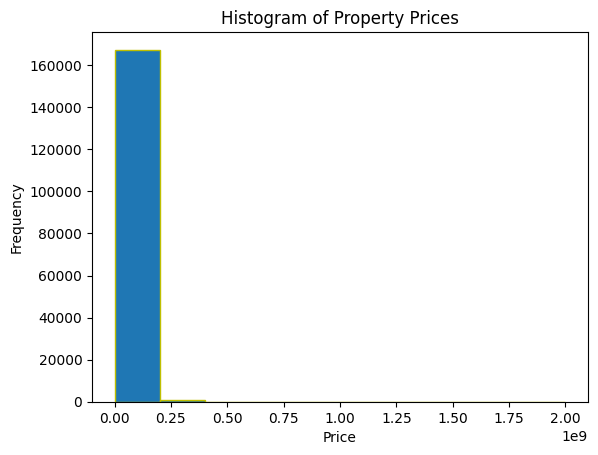

In [50]:
plt.hist(data['price'], bins=10, edgecolor='y')
plt.title('Histogram of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Interpretation
Most of the properties prices ranges from 0 - 0.20 x 10^9

#### KDE Plot

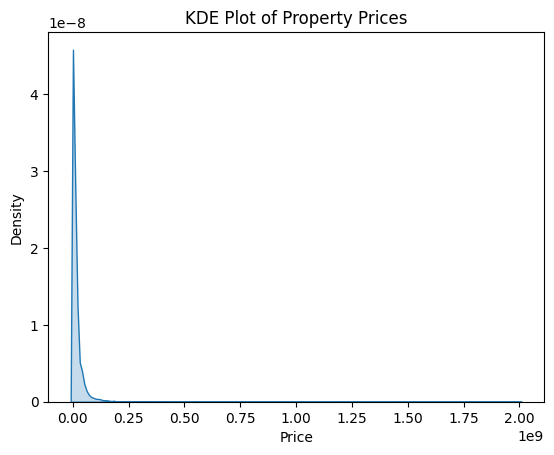

In [53]:
sns.kdeplot(data['price'], fill=True)
plt.title('KDE Plot of Property Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

#### Interpretation
Most of the properties prices ranges from 0 - 0.20 x 10^9

#### Pair Plot With Others

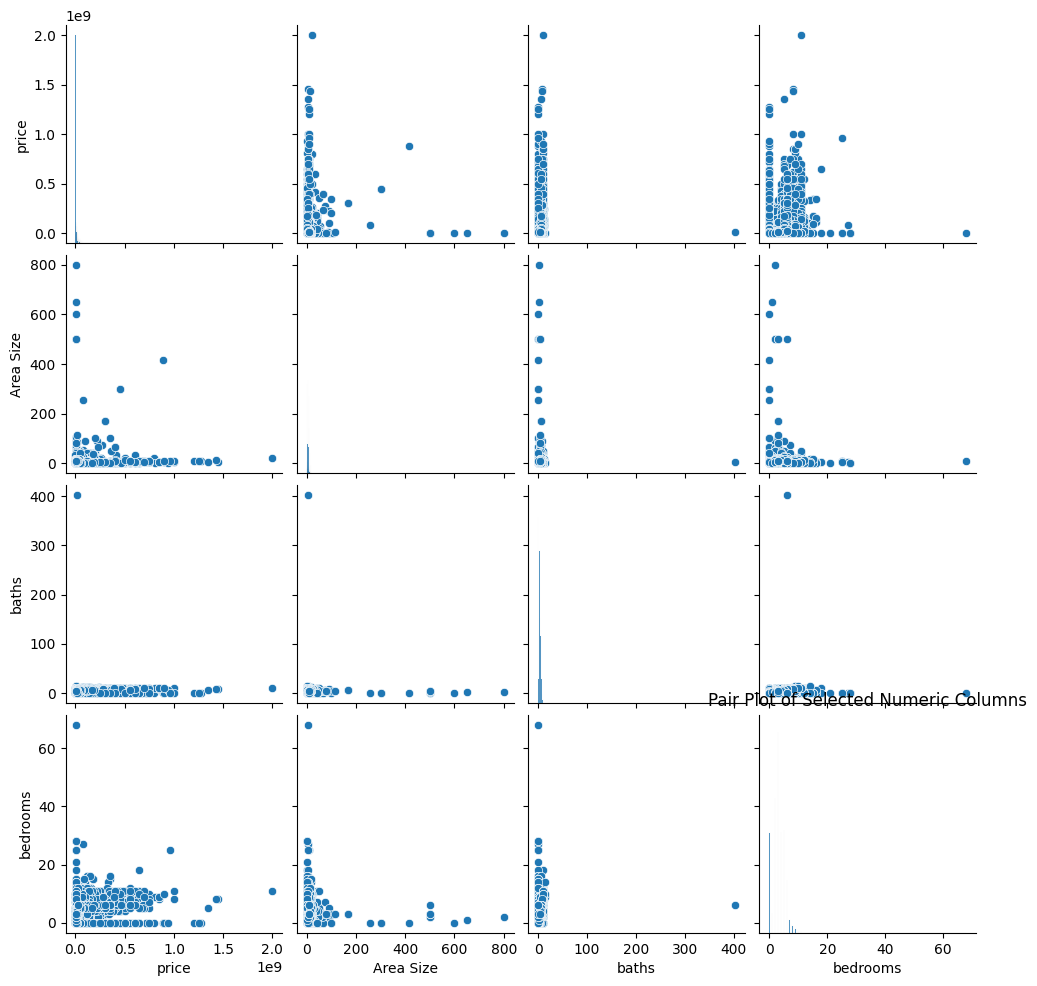

In [54]:
sns.pairplot(data[['price', 'Area Size', 'baths', 'bedrooms']])
plt.title('Pair Plot of Selected Numeric Columns')
plt.show()


---
<h3 align = center> 'latitude' </h3> 

---


#### Summary

In [55]:
latitude_summary = data['latitude'].describe()
latitude_summary

count    168446.000000
mean         29.859519
std           3.807870
min          11.052446
25%          24.948536
50%          31.459784
75%          33.560887
max          73.184088
Name: latitude, dtype: float64

#### Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

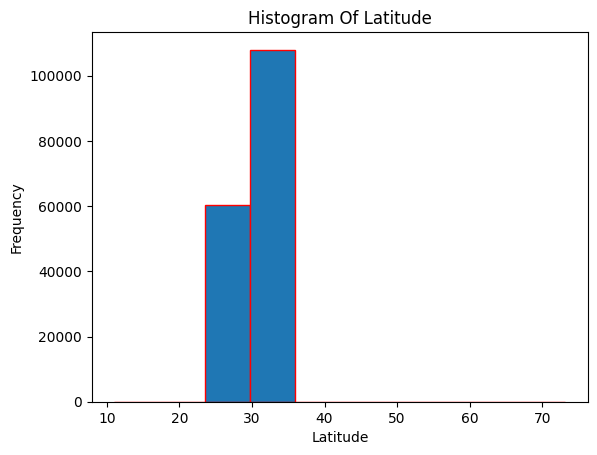

In [67]:
plt.hist(data['latitude'] , bins = 10 ,histtype='barstacked' , edgecolor = 'r')
plt.title('Histogram Of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show

#### Interpretation

Most Latitude values ranges from 30 to 35

#### Box Plot 


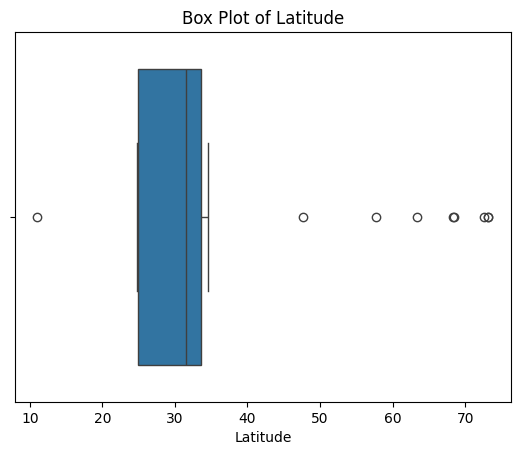

In [73]:
sns.boxplot(x=data['latitude'])
plt.title('Box Plot of Latitude')
plt.xlabel('Latitude')
plt.show()

#### Interpretation

As we can see from box plot , there are some outliers 


#### Scatter Plot Vs Longitude

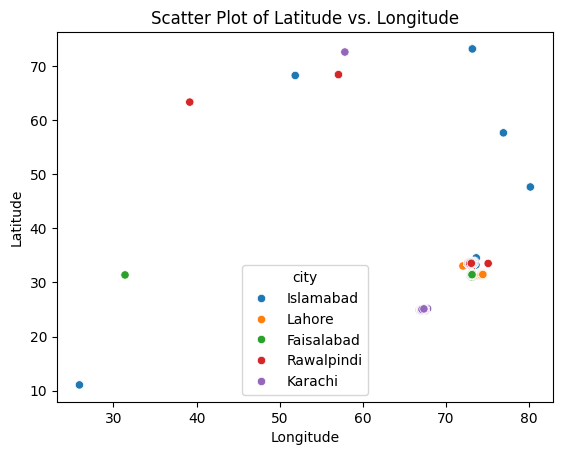

In [77]:
sns.scatterplot(x='longitude', y='latitude', data=data , hue = 'city')
plt.title('Scatter Plot of Latitude vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


---
<h3 align = center> 'Area Size' </h3> 

---


#### Summary

In [78]:
area_size_summary = data['Area Size'].describe()
area_size_summary

count    168446.000000
mean          5.892188
std           5.778327
min           0.000000
25%           3.000000
50%           5.000000
75%           8.000000
max         800.000000
Name: Area Size, dtype: float64

#### Histogram

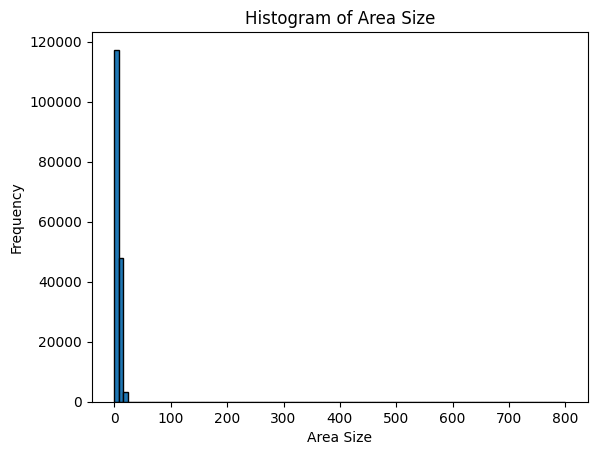

In [82]:
plt.hist(data['Area Size'], bins=100, edgecolor='k')
plt.title('Histogram of Area Size')
plt.xlabel('Area Size')
plt.ylabel('Frequency')
plt.show()

#### Interpretation

The most of the property area size ranges from 0 - 10

#### Box Plot

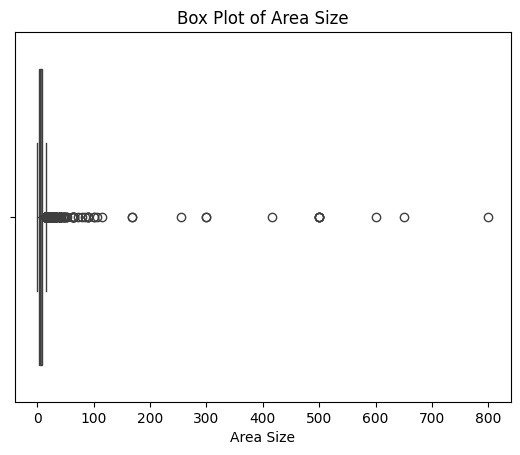

In [85]:
sns.boxplot(x=data['Area Size'])
plt.title('Box Plot of Area Size')
plt.xlabel('Area Size')
plt.show()

#### Interpretation

As we can see , there are some outliers 

#### Hexbin Plot Vs Price

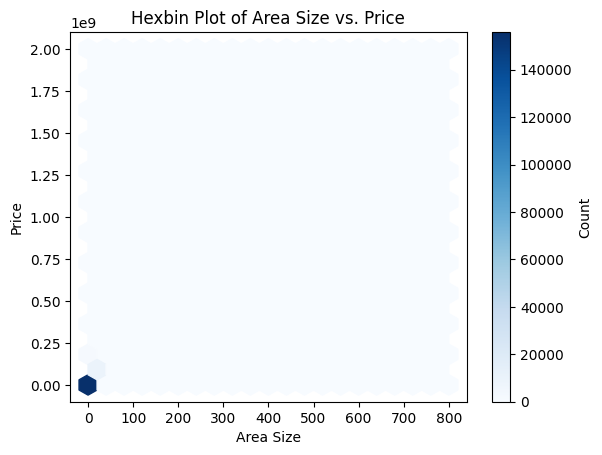

In [91]:
plt.hexbin(data['Area Size'], data['price'], gridsize=20, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Area Size vs. Price')
plt.xlabel('Area Size')
plt.ylabel('Price')
plt.show()

<h2 align = center> <font color = "EE00FF"> Data Preprocessing </font></h2>

### Dropping Irrelevant Columns

In [10]:
data = data.drop(['property_id','location_id','page_url','date_added','area','agency','agent','Area Category','province_name','latitude','longitude'],axis=1)
data

,property_type,price,location,city,baths,purpose,bedrooms,Area Type,Area Size
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,Marla,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,Marla,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,Marla,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,Kanal,2.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,Marla,8.0
...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,0,For Sale,6,Marla,9.6
168442,House,12500000,Gadap Town,Karachi,0,For Sale,3,Marla,8.0
168443,House,27000000,Gadap Town,Karachi,0,For Sale,6,Marla,9.6
168444,House,11000000,Gadap Town,Karachi,0,For Sale,3,Marla,7.8


#### Why I dropped the columns ?

**property_id** : Because it was irrelevant for regression.


**location_id** : Because it was also irrelevant.

**page_url** : Because it was just links to website.

**date_added** : Because it was just date and not useful for analysis.

**area** : Because it was categorical column and we have numerical version of this.

**agency** : Because it has many missing values and also it wasn't very important.

**agent** : Because it has many missing values and also it wasn't very important.

**Area Category** : It was showing the range of area (5-10 Marla) of location which also wasn't need.

**province_name** : It was showing the name of province where location is located which also wasn't need because we are doing city wise analysis.

**latitude** : Because it was showing the latitude of location which also wasn't need because we are doing city wise analysis.

**longitude** : Because it was showing the longitude of location which also wasn't need because we are doing city wise analysis.





<h2 align = center><font color = "#11EF1F"> Feature Engineering

### Merging 'Area Type' and 'Area Size' Columns and Making New Feature Called (Area in sqft)

In [11]:
# Convert areas in 'Marla' to square feet
data.loc[data['Area Type'] == 'Marla', 'Area in sqft'] = data['Area Size'] * 272.251

# Convert areas in 'Kanal' to square feet
data.loc[data['Area Type'] == 'Kanal', 'Area in sqft'] = data['Area Size'] * 5445

data


,property_type,price,location,city,baths,purpose,bedrooms,Area Type,Area Size,Area in sqft
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,Marla,4.0,1089.0040
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,Marla,5.6,1524.6056
2,House,16500000,G-15,Islamabad,6,For Sale,5,Marla,8.0,2178.0080
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,Kanal,2.0,10890.0000
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,Marla,8.0,2178.0080
...,...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,0,For Sale,6,Marla,9.6,2613.6096
168442,House,12500000,Gadap Town,Karachi,0,For Sale,3,Marla,8.0,2178.0080
168443,House,27000000,Gadap Town,Karachi,0,For Sale,6,Marla,9.6,2613.6096
168444,House,11000000,Gadap Town,Karachi,0,For Sale,3,Marla,7.8,2123.5578


### Now Dropping 'Area Type' and 'Area Size'

In [12]:

data = data.drop(['Area Type','Area Size'],axis = 1)
data

,property_type,price,location,city,baths,purpose,bedrooms,Area in sqft
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,1089.0040
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,1524.6056
2,House,16500000,G-15,Islamabad,6,For Sale,5,2178.0080
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,10890.0000
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,2178.0080
...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,0,For Sale,6,2613.6096
168442,House,12500000,Gadap Town,Karachi,0,For Sale,3,2178.0080
168443,House,27000000,Gadap Town,Karachi,0,For Sale,6,2613.6096
168444,House,11000000,Gadap Town,Karachi,0,For Sale,3,2123.5578


### Repositioning the columns

In [13]:
data = data[['city','location','bedrooms','baths','Area in sqft','property_type','purpose','price']]
data

,city,location,bedrooms,baths,Area in sqft,property_type,purpose,price
0,Islamabad,G-10,2,2,1089.0040,Flat,For Sale,10000000
1,Islamabad,E-11,3,3,1524.6056,Flat,For Sale,6900000
2,Islamabad,G-15,5,6,2178.0080,House,For Sale,16500000
3,Islamabad,Bani Gala,4,4,10890.0000,House,For Sale,43500000
4,Islamabad,DHA Defence,3,3,2178.0080,House,For Sale,7000000
...,...,...,...,...,...,...,...,...
168441,Karachi,Gadap Town,6,0,2613.6096,House,For Sale,26500000
168442,Karachi,Gadap Town,3,0,2178.0080,House,For Sale,12500000
168443,Karachi,Gadap Town,6,0,2613.6096,House,For Sale,27000000
168444,Karachi,Gadap Town,3,0,2123.5578,House,For Sale,11000000


<h2 align = center> <font color = '#FF11AA'> Removing Outliers

### Removing Outliers From 'price'

In [14]:


Q1 = data['price'].quantile(0.25)

Q3 = data['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)

upper_bound = Q3 + (1.5 * IQR)

data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]



### Removing Outliers From 'bedroom'

In [15]:



Q1 = data['bedrooms'].quantile(0.25)

Q3 = data['bedrooms'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)

upper_bound = Q3 + (1.5 * IQR)

data = data[(data['bedrooms'] >= lower_bound) & (data['bedrooms'] <= upper_bound)]




### Removing Outliers From 'baths'

In [16]:

Q1 = data['baths'].quantile(0.25)

Q3 = data['baths'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)

upper_bound = Q3 + (1.5 * IQR)

data = data[(data['baths'] >= lower_bound) & (data['baths'] <= upper_bound)]



<h2 align = 'center'> <font color = '#B8A1FA'> Encoding the categorical Data

### City Name Encoding

Since, 'city' in nominal data, so we use Frequency Encoding

In [17]:
frequency = data['city'].value_counts(normalize=True)

data['city'] = data['city'].map(frequency)
data

,city,location,bedrooms,baths,Area in sqft,property_type,purpose,price
0,0.22344,G-10,2,2,1089.0040,Flat,For Sale,10000000
1,0.22344,E-11,3,3,1524.6056,Flat,For Sale,6900000
2,0.22344,G-15,5,6,2178.0080,House,For Sale,16500000
3,0.22344,Bani Gala,4,4,10890.0000,House,For Sale,43500000
4,0.22344,DHA Defence,3,3,2178.0080,House,For Sale,7000000
...,...,...,...,...,...,...,...,...
168441,0.35184,Gadap Town,6,0,2613.6096,House,For Sale,26500000
168442,0.35184,Gadap Town,3,0,2178.0080,House,For Sale,12500000
168443,0.35184,Gadap Town,6,0,2613.6096,House,For Sale,27000000
168444,0.35184,Gadap Town,3,0,2123.5578,House,For Sale,11000000


### Location Name Encoding

Since , 'location' is also ordinal data we also use Frequency Encoding



In [18]:

frequency = data['location'].value_counts(normalize=True)

data['location'] = data['location'].map(frequency)

data

,city,location,bedrooms,baths,Area in sqft,property_type,purpose,price
0,0.22344,0.003858,2,2,1089.0040,Flat,For Sale,10000000
1,0.22344,0.016762,3,3,1524.6056,Flat,For Sale,6900000
2,0.22344,0.007762,5,6,2178.0080,House,For Sale,16500000
3,0.22344,0.007638,4,4,10890.0000,House,For Sale,43500000
4,0.22344,0.104053,3,3,2178.0080,House,For Sale,7000000
...,...,...,...,...,...,...,...,...
168441,0.35184,0.019651,6,0,2613.6096,House,For Sale,26500000
168442,0.35184,0.019651,3,0,2178.0080,House,For Sale,12500000
168443,0.35184,0.019651,6,0,2613.6096,House,For Sale,27000000
168444,0.35184,0.019651,3,0,2123.5578,House,For Sale,11000000


### Property_type Encoding

Since , 'property_type' column have less categories , so we can use One Hot Encoding 

In [19]:
data = pd.get_dummies(data , columns=['property_type'],drop_first=True)
data

,city,location,bedrooms,baths,Area in sqft,purpose,price,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion
0,0.22344,0.003858,2,2,1089.0040,For Sale,10000000,True,False,False,False,False,False
1,0.22344,0.016762,3,3,1524.6056,For Sale,6900000,True,False,False,False,False,False
2,0.22344,0.007762,5,6,2178.0080,For Sale,16500000,False,True,False,False,False,False
3,0.22344,0.007638,4,4,10890.0000,For Sale,43500000,False,True,False,False,False,False
4,0.22344,0.104053,3,3,2178.0080,For Sale,7000000,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,0.35184,0.019651,6,0,2613.6096,For Sale,26500000,False,True,False,False,False,False
168442,0.35184,0.019651,3,0,2178.0080,For Sale,12500000,False,True,False,False,False,False
168443,0.35184,0.019651,6,0,2613.6096,For Sale,27000000,False,True,False,False,False,False
168444,0.35184,0.019651,3,0,2123.5578,For Sale,11000000,False,True,False,False,False,False


### Purpose Column Encoding

Since , 'purpose' column also have less categories , so we can use One Hot Encoding .


In [20]:

data = pd.get_dummies(data , columns=['purpose'],drop_first=True)

data

,city,location,bedrooms,baths,Area in sqft,price,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,purpose_For Sale
0,0.22344,0.003858,2,2,1089.0040,10000000,True,False,False,False,False,False,True
1,0.22344,0.016762,3,3,1524.6056,6900000,True,False,False,False,False,False,True
2,0.22344,0.007762,5,6,2178.0080,16500000,False,True,False,False,False,False,True
3,0.22344,0.007638,4,4,10890.0000,43500000,False,True,False,False,False,False,True
4,0.22344,0.104053,3,3,2178.0080,7000000,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,0.35184,0.019651,6,0,2613.6096,26500000,False,True,False,False,False,False,True
168442,0.35184,0.019651,3,0,2178.0080,12500000,False,True,False,False,False,False,True
168443,0.35184,0.019651,6,0,2613.6096,27000000,False,True,False,False,False,False,True
168444,0.35184,0.019651,3,0,2123.5578,11000000,False,True,False,False,False,False,True


### Shape Of Data After Preprocessing

In [21]:
print("Total Rows" ,data.shape[0])
print("Total Columns" ,data.shape[1])

Total Rows 152663
Total Columns 13


### Normalizing The Data

In [22]:
y = data['price']

scaler = StandardScaler()

X = data.drop('price',axis=1)

X_scaled = scaler.fit_transform(X)


### Plotting Correlation Graphs

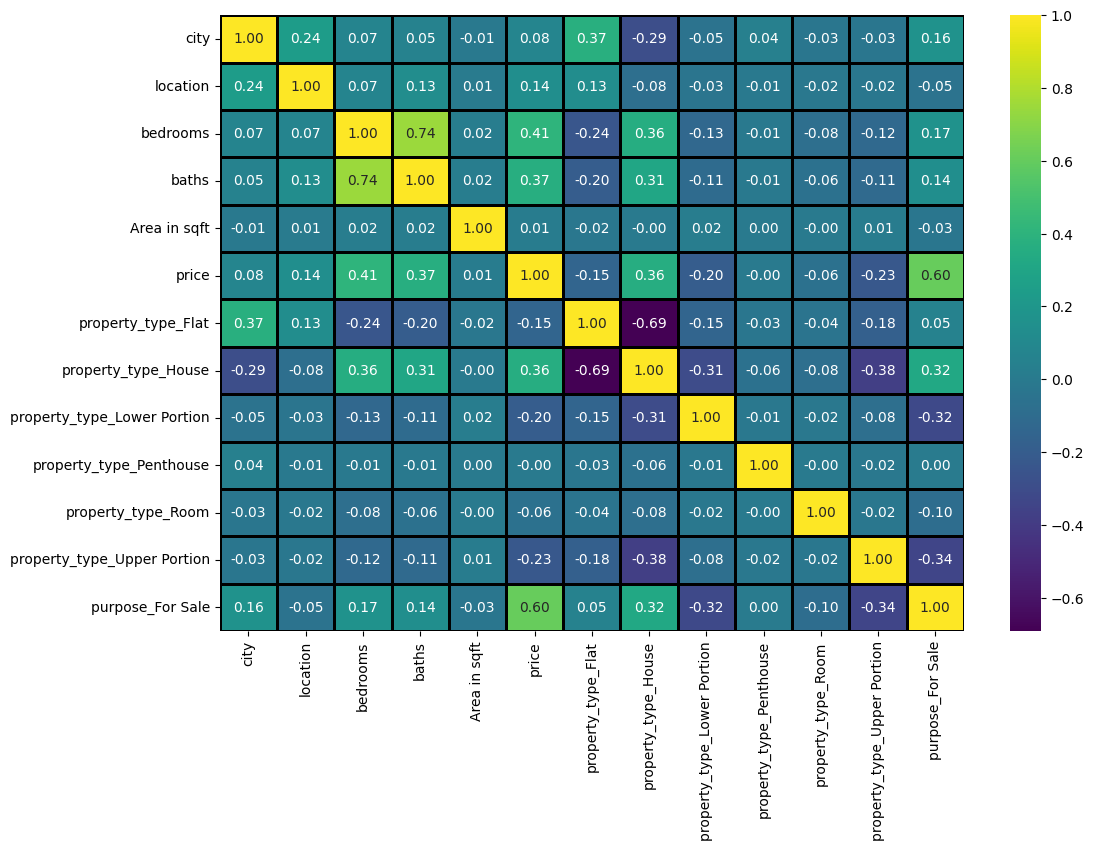

In [23]:
plt.figure(figsize=(12,8))

corrMatrix = sns.heatmap(data=data.corr(),cmap='viridis',linewidths=1,linecolor='black',annot=True , fmt= ".2f")

plt.show()

### Showing Most Important Features According to My Target Feature 'price'

In [24]:


important_features = data.corr()['price'].sort_values(ascending=False)
important_features



price                          1.000000
purpose_For Sale               0.604006
bedrooms                       0.407283
baths                          0.366384
property_type_House            0.363901
location                       0.139947
city                           0.078045
Area in sqft                   0.011365
property_type_Penthouse       -0.000131
property_type_Room            -0.059182
property_type_Flat            -0.145122
property_type_Lower Portion   -0.202152
property_type_Upper Portion   -0.231200
Name: price, dtype: float64

<h2 align = center> <font color = "#ABAEFA"> Statistical Tests On Data</font></h2>


### Hypothesis Testing



---

<h3 align = center> 1st Hypothesis Test </h3>

---

#### Null Hypothesis: #### 
There is no significant difference between the mean price of houses in Karachi and that of Lahore.

#### Alternative Hypothesis: ####
 There is a significant difference between the mean price of houses in Karachi and that of Lahore.


In [29]:

Stat_data = pd.read_csv(('zameen.csv'))


t_stat, p_value = stats.ttest_ind(Stat_data[Stat_data['city'] == 'Karachi']['price'], Stat_data[Stat_data['city'] == 'Lahore']['price'])

p_value



5.494275764259658e-150

#### Result
 Since p_value is less than 0.05, we reject the null hypothesis. There is a significant difference between the mean price of houses in Karachi and that of Lahore.


---

<h3 align = center> 2nd Hypothesis Test </h3>

---

#### Null Hypothesis: 
There is no significant difference between the mean price of houses in Karachi and that of Islamabad.

#### Alternative Hypothesis: 
There is a significant difference between the mean price of houses in Karachi and that of Islamabad.



In [30]:
t_stat, p_value = stats.ttest_ind(Stat_data[Stat_data['city'] == 'Karachi']['price'], Stat_data[Stat_data['city'] == 'Islamabad']['price'])

p_value


5.494275764259658e-150


#### Result 
 Since p_value is less than 0.05, we reject the null hypothesis. There is a significant difference between the mean price of houses in Karachi and that of Islamabad.

---

<h3 align = center> 3rd Hypothesis Test </h3>

---



#### Null Hypothesis:

There is no significant difference between the mean price of houses in Islamabad but in different areas.

#### Alternative Hypothesis:

There is a significant difference between the mean price of houses in Islamabad but in different areas.



In [36]:

f_stat, p_value = stats.f_oneway(*[Stat_data[Stat_data['city'] == 'Islamabad']['price'][Stat_data['location'] == location] for location in Stat_data[Stat_data['city'] == 'Islamabad']['location'].unique()])

print(f'F-statistic: {f_stat}, p-value: {p_value}')


F-statistic: 15.19541408747769, p-value: 0.0


#### Result

 Since p_value is less than 0.05, we reject the null hypothesis. There is a significant difference between the mean price of houses in different areas of Islamabad.






---

<h2 align = center> <font color = "#EFAE0A"> Training Baseline Models </font></h2>


---
<h2 align =center> Training Linear Regression Model  </h2>

---

### Splitting Data Into Training And Test Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Linear Regression

In [27]:

lr = LinearRegression()

lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_test)



### Model Score

In [28]:
print("Model Score :" , lr.score(X_test,y_test))


Model Score : 0.501872586792319


### Plotting 

#### Real Vs Predicted

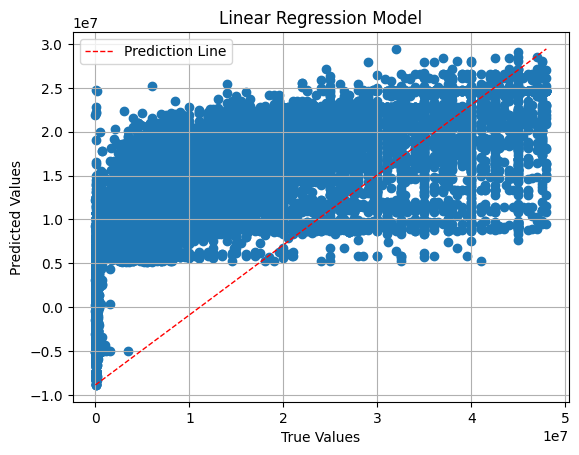

In [26]:


plt.scatter(y_test, lr_predictions)

plt.plot([y_test.min(), y_test.max()], [lr_predictions.min(), lr_predictions.max()], 'r--', lw=1, label='Prediction Line')

plt.xlabel('True Values')

plt.ylabel('Predicted Values')

plt.title('Linear Regression Model')

plt.legend()

plt.grid(True)

plt.show()

#### Residual Plot

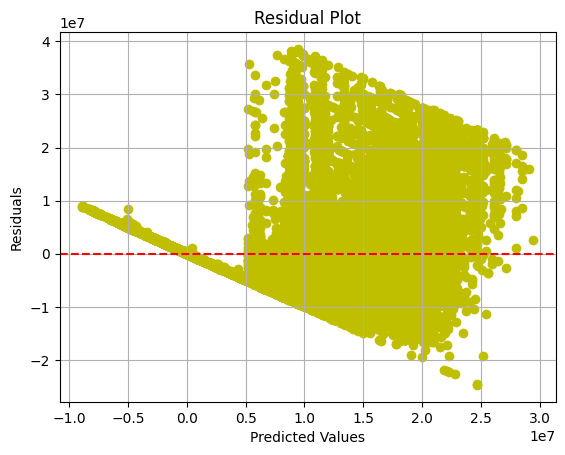

In [29]:

residuals = y_test - lr_predictions

plt.scatter(lr_predictions, residuals , c = 'y')

plt.axhline(0, color='r', ls='--')

plt.xlabel('Predicted Values')

plt.ylabel('Residuals')

plt.title('Residual Plot')

plt.grid(True)

plt.show()



---
<h2 align =center>  Training Decision Tree Model </h2>

---



In [31]:

dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

dt_predictions = dt.predict(X_test)





### Model Score

In [32]:
print("Model Score :" ,dt.score(X_test,y_test))




Model Score : 0.8937267567947825


### Plotting



#### Real Vs Predicted 

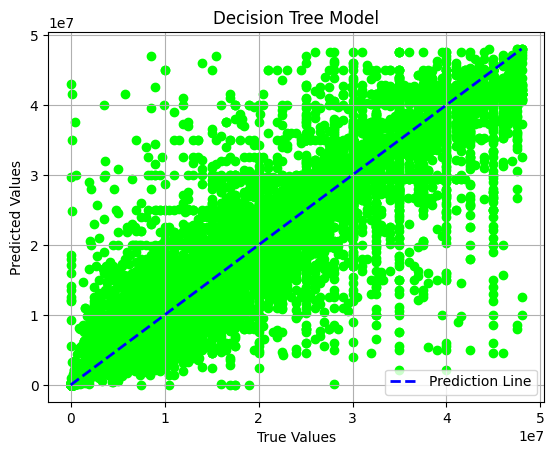

In [29]:

plt.scatter(y_test, dt_predictions, color = 'lime')

plt.plot([y_test.min(), y_test.max()], [dt_predictions.min(), dt_predictions.max()], 'b--', lw=2, label='Prediction Line')

plt.xlabel('True Values')

plt.ylabel('Predicted Values')

plt.title('Decision Tree Model')

plt.legend()

plt.grid(True)


plt.show()

#### Residual Plot

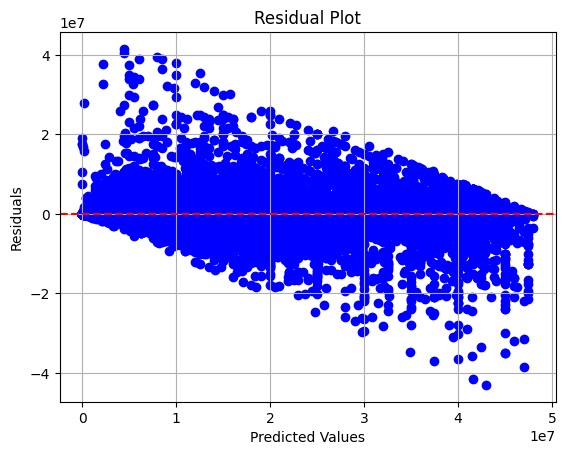

In [30]:

residuals = y_test - dt_predictions

plt.scatter(dt_predictions, residuals, color = 'blue')

plt.axhline(0, color='r', ls='--')

plt.xlabel('Predicted Values')

plt.ylabel('Residuals')

plt.title('Residual Plot')

plt.grid(True)

plt.show()


---
<h2 align = center> Training Random Forest Model </h2>    

---

In [34]:



rf = RandomForestRegressor()

rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)



### Model Score

In [35]:

print('Model Score :' ,rf.score(X_test,y_test))

Model Score : 0.9174931878078612


### Plotting


#### Real Vs Predicted

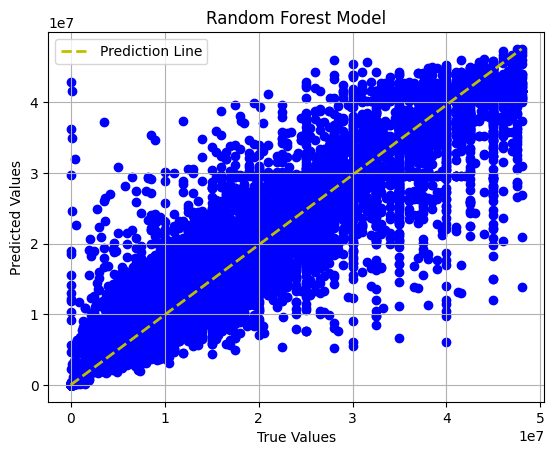

In [32]:

plt.scatter(y_test, rf_predictions, color = 'blue')

plt.plot([y_test.min(), y_test.max()], [rf_predictions.min(), rf_predictions.max()], 'y--', lw=2, label='Prediction Line')

plt.xlabel('True Values')

plt.ylabel('Predicted Values')

plt.title('Random Forest Model')

plt.legend()

plt.grid(True)

plt.show()

#### Residual Plot

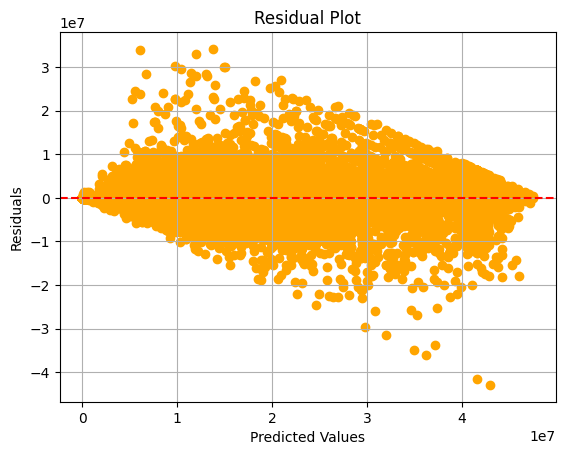

In [33]:

residuals = y_test - rf_predictions

plt.scatter(rf_predictions, residuals, color = 'orange')

plt.axhline(0, color='r', ls='--')

plt.xlabel('Predicted Values')

plt.ylabel('Residuals')

plt.title('Residual Plot')

plt.grid(True)

plt.show()


---
<h2 align = center> Training Gradient Boosting Training </h2>    

---

In [36]:


gb = GradientBoostingRegressor()

gb.fit(X_train, y_train)

gb_predictions = gb.predict(X_test)



### Model Score

In [37]:

print('Model Score :' ,gb.score(X_test,y_test))

Model Score : 0.8434611841922862


### Plotting




#### Real Vs Predicted

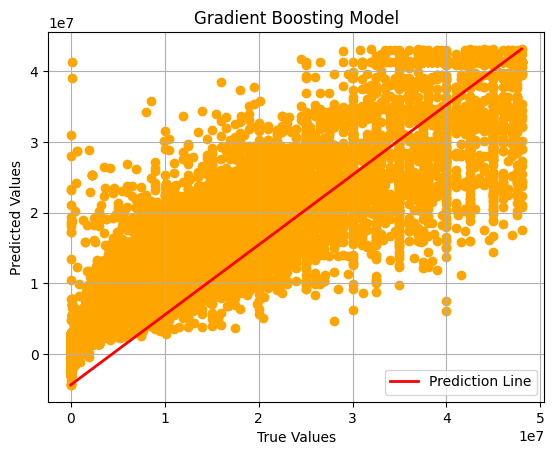

In [35]:

plt.scatter(y_test, gb_predictions, color = 'orange')

plt.plot([y_test.min(), y_test.max()], [gb_predictions.min(), gb_predictions.max()], 'r', lw=2, label='Prediction Line')

plt.xlabel('True Values')

plt.ylabel('Predicted Values')

plt.title('Gradient Boosting Model')

plt.legend()

plt.grid(True)

plt.show()


#### Residual Plot

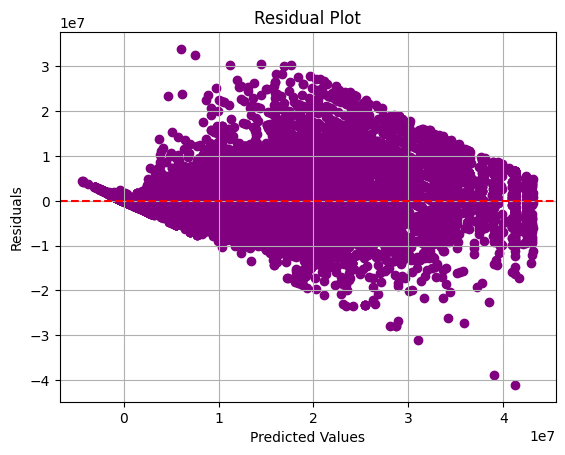

In [36]:

residuals = y_test - gb_predictions

plt.scatter(gb_predictions, residuals, color = 'purple')

plt.axhline(0, color='r', ls='--')

plt.xlabel('Predicted Values')

plt.ylabel('Residuals')

plt.title('Residual Plot')

plt.grid(True)

plt.show()



---
<h2 align = center> <font> Training Artificial Neural Networks </font></h2>

---

In [188]:
model = keras.Sequential([
    Dense(units=16384, activation='relu', input_shape=(12,)), 

    Dense(units=128, activation='relu'),

    #     Dense(units=256, activation='relu'),
#     Dense(units=128, activation='relu'),
#     Dense(units=64, activation='relu'),
#     Dense(units=32, activation='relu'),
#     Dense(units=16, activation='relu'),
#     Dense(units=8, activation='relu'),
#     Dense(units=4, activation='relu'),
#     Dense(units=1, activation='relu'),





#     Dense(units=64, activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(units=32, activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(units=16, activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     Dropout(0.3),

    Dense(units=1)
])


In [189]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 16384)          │       212,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,310,401 (8.81 MB)

 Trainable params: 2,310,401 (8.81 MB)

 Non-trainable params: 0 (0.00 B)

### Model Compilation

In [190]:

model.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])



### Model Fitting

In [191]:
history = model.fit(X_train_temp, y_train_temp, epochs=1000, batch_size=4096, validation_split=0.2)



Epoch 1/1000



13/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 236631525163008.0000 - mae: 10349364.0000

W0000 00:00:1723615862.398482      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 236936065187840.0000 - mae: 10358419.0000

W0000 00:00:1723615863.542924      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



W0000 00:00:1723615863.916307      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 236943631712256.0000 - mae: 10358856.0000 - val_loss: 233242191986688.0000 - val_mae: 10310775.0000



Epoch 2/1000


W0000 00:00:1723615864.246907      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 233295577088000.0000 - mae: 10267552.0000 - val_loss: 216328141012992.0000 - val_mae: 9862151.0000



Epoch 3/1000



24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 206579236339712.0000 - mae: 9561449.0000 - val_loss: 158444531220480.0000 - val_mae: 8204432.0000



Epoch 4/1000



24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 140020354646016.0000 - mae: 7543217.0000 - val_loss: 85282086977536.0000 - val_mae: 5712584.0000



Epoch 5/1000



24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 80188062826496.0000 - mae: 5671447.5000 - val_loss: 70226293030912.0000 - val_mae: 5587135.0000



Epoch 6/1000



24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70023376797696.0000 - mae: 5613039.0000 - val_loss: 65377082015744.0000 - val_mae: 5478512.0000



Epoch 7/1000



24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 66181662769152.0000 - mae: 5540915.5000 - val_loss: 63000765530112.0000 - val_mae: 5409030.0000



Epoch 8/1000



24/24 ━━━━━━━━━━

### Loss Curve Plot

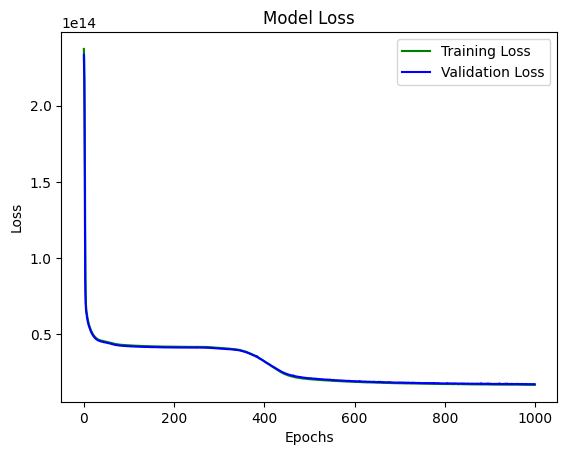

In [192]:
plt.plot(history.history['loss'],'g',label = 'Training Loss')

plt.plot(history.history['val_loss'],'b',label = 'Validation Loss')

plt.title('Model Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

### Interpretation 

As we can see our Training Loss and Validation Loss are decreasing together , but still loss is high that indicates that our model is underfitted , which means maybe data is not enough or the model is not complex to identify the underlying pattern. But due to lack of resources we have to stop here.

In [193]:
print('MSE:',model.evaluate(X_test_temp, y_test_test))


955/955 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16311065247744.0000 - mae: 2253648.2500



MSE: [16482316582912.0, 2276107.0]


### Predicted Value Vs Actual Value Plot

955/955 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


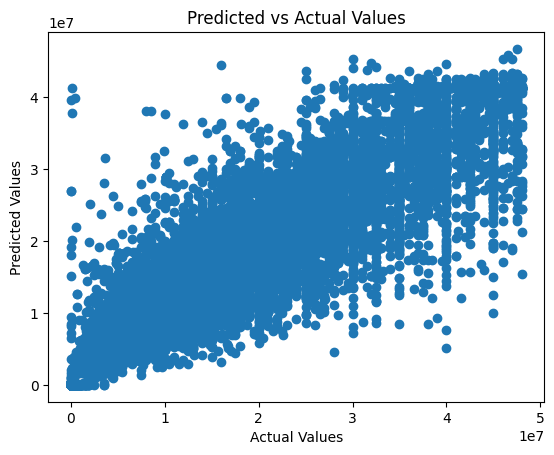

In [194]:
y_pred = model.predict(X_test)

### Comparing Predictions with Actual Values

plt.scatter(y_test, y_pred)

plt.title('Predicted vs Actual Values')

plt.xlabel('Actual Values')

plt.ylabel('Predicted Values')

plt.show()



### Residual Plot

955/955 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


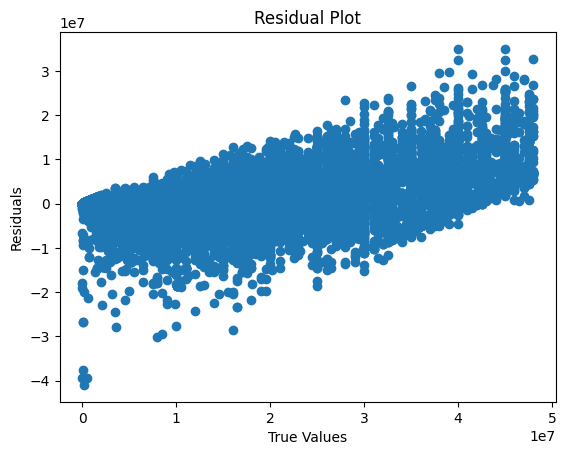

In [195]:
y_pred = model.predict(X_test).flatten()

residuals = y_test - y_pred

plt.scatter(y_test,residuals)

plt.title('Residual Plot')

plt.xlabel('True Values')

plt.ylabel('Residuals')

plt.show()



### Interpretation 

As we can see the Residual Plot shows that the model's predictions are relatively close to the actual values, and the model is not little sensitive to outliers.

In [196]:
print('Neural Network Performance:')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R-squared Score:', metrics.r2_score(y_test, y_pred))


Neural Network Performance:



Mean Absolute Error: 2276107.90495536



Mean Squared Error: 16482314746620.729



Root Mean Squared Error: 4059841.7144786236



R-squared Score: 0.8700618269769494


### Conclusion (ANN) :

As we can see model R-Squared Score is 0.87 , which means model can explain approximately 87% of the variance in the data. This indicates that the model is good at making predictions based on the given features. The residual plot shows that the model's predictions are relatively close to the actual values, and the model is not overly sensitive to outliers.



---
<h2 align = center>Training Convolution Neural Network </h2>   


---


### Can we use CNN for Regression Problem ?

Yes, Convolution Neural Networks (CNN) can be used for regression problems. CNNs are designed to process 2D data such as images, which is a common use case for regression problems.


### Is CNN good idea for Regression Problem ?

Yes, CNNs can be effective for regression problems when the input data is 2D, such as images or videos. While CNNs can be used for regression problems, it's important to consider the specific characteristics of the dataset and the requirements of the regression problem before choosing a model. If the dataset is 2D, CNNs might be a good choice. Otherwise, other machine learning models, such as linear regression, decision trees, or neural networks, may be more suitable for regression problems.

### What if we have multi dimenstional Data ?

If we have multi-dimensional input data, we can use 1D convolutions or 2D convolutions depending on the dimensions of the data. 1D convolutions can be applied to 1D input data, while 2D convolutions can be applied to 2D input data, such as images or videos.

### Training CNN

In [117]:


model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(12, 1)),
    MaxPooling1D(pool_size=2),

    Flatten(),

    Dense(units=4096, activation='relu'),
    Dropout(0.3),

    # Output Layer
    Dense(units=1)
])








/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [118]:

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 10, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4096)           │     1,314,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,319,169 (5.03 MB)

 Trainable params: 1,319,169 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

### Model Compilation

In [120]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05), loss='mean_squared_error', metrics=['mae'])



### Model Fitting

In [121]:
history = model.fit(X_train_temp, y_train_temp, epochs=200, batch_size=4096, validation_split=0.2)



Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 234077496016896.0000 - mae: 10301171.0000 - val_loss: 199749718245376.0000 - val_mae: 9693011.0000
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 174802031607808.0000 - mae: 9319601.0000 - val_loss: 126995019071488.0000 - val_mae: 8918280.0000
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 125988000235520.0000 - mae: 8491423.0000 - val_loss: 106128599941120.0000 - val_mae: 7976906.5000
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 108564190330880.0000 - mae: 7854272.0000 - val_loss: 95738067419136.0000 - val_mae: 7232210.5000
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 98216758476800.0000 - mae: 7226776.5000 - val_loss: 90123882463232.0000 - val_mae: 6841946.5000
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 90219512594432.0000 - mae: 6820175.5000 - val_loss: 84917987835904.0000 - val_mae: 6509223.0000
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - l

### Loss Curve Plot

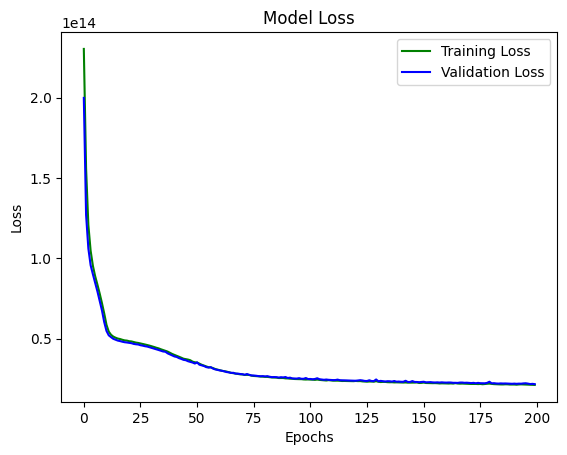

In [122]:
plt.plot(history.history['loss'],'g',label = 'Training Loss')

plt.plot(history.history['val_loss'],'b',label = 'Validation Loss')

plt.title('Model Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

In [123]:

print('MSE:',model.evaluate(X_test_temp, y_test_temp))


955/955 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 20536524537856.0000 - mae: 2571133.0000
MSE: [20563930120192.0, 2591240.0]



### Predicted Values Vs Actual Values Plot

955/955 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
(30533, 1)


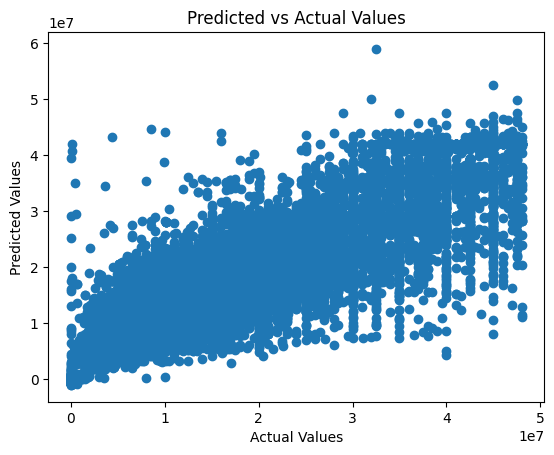

In [124]:

y_pred = model.predict(X_test)

print(y_pred.shape)

### Comparing Predictions with Actual Values

plt.scatter(y_test, y_pred)

plt.title('Predicted vs Actual Values')

plt.xlabel('Actual Values')

plt.ylabel('Predicted Values')

plt.show()



### Residual Plot

955/955 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


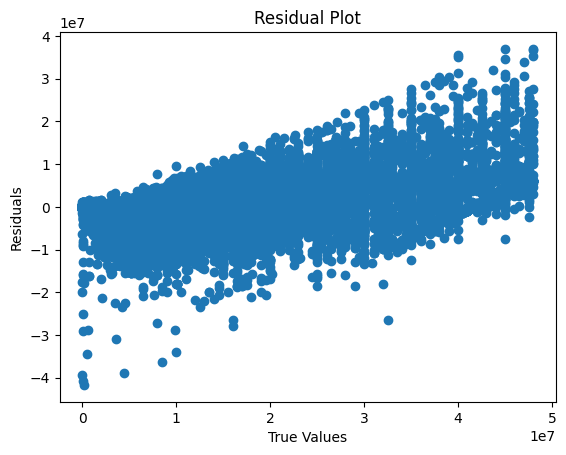

In [125]:
y_pred = model.predict(X_test).flatten()

residuals = y_test - y_pred

plt.scatter(y_test,residuals)

plt.title('Residual Plot')

plt.xlabel('True Values')

plt.ylabel('Residuals')

plt.show()



In [126]:

print('Neural Network Performance:')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R-squared Score:', metrics.r2_score(y_test, y_pred))


Neural Network Performance:
Mean Absolute Error: 2591239.0424176394
Mean Squared Error: 20563945659973.062
Root Mean Squared Error: 4534748.687631219
R-squared Score: 0.8378843281250881


### Conclusion (CNN)

As we can see after so many experiment ,the highest model score i got through CNN in 0.837 which means model can explain approximately 83.7% of the variance in the data. This indicates that the model is  good at making predictions based on the given features. The residual plot shows that the model's predictions are far to the actual values, and the model is not overly sensitive to outliers.

Since ,CNN mainly used for Image and text classification ,so this was predictible that CNN for Regression problem will do worse performance than ANN and baseline models.




<h2 align = center> Conclusion </h2>


1. ANN is a good choice for regression problems when the input data is 1D, such as numerical data. It can capture linear and non-linear patterns in the data and learn complex features.

2. CNN is a good choice for regression problems when the input data is 2D, such as images or videos. It can capture spatial patterns and learn complex features from the data. However, it may not be as effective as other machine learning models for regression problems with higher-dimensional input data, such as text or audio.

3. Both ANN and CNN can be used for regression problems, but they may not be as effective as other machine learning models for regression problems with higher-dimensional input data, such as text or audio.

4. The best choice depends on the specific characteristics of the dataset and the requirements of the regression problem. If the dataset is 1D, ANN might be a good choice. If the dataset is 2D, CNN might be a good choice. Otherwise, other machine learning models, such as linear regression, decision trees, or neural networks, may be more suitable for regression problems.

5. Experimentation and tuning are important to find the best model for your specific regression problem. The best model will depend on various factors, such as the dataset, the problem characteristics, and the available computational resources.

So, the best models was :

1. 0.91 (Random Forest)
2. 0.89 (Artificial Neural Network)